#**Predictive Analysis of Crime Incidence based on SocioEconomic factors in Kenya**

****

In [ ]:
# Written by:   Odhiambo Paul Erick
#               SCT211-0094/2016

# Course:       BSc. Computer Science
# Institution:  JKUAT -- SCIT -- Department of Computing
# Course Unit:  ICS2406 -- Computer Systems Project

*   Working environment - Google Colab








In [ ]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [ ]:
!python -c "import sys; print(sys.version)"

3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]


This project aims to tackle crime by predicting the number of crimes that will occur in the near future. The main metric used is the measure of economic growth. Gross Domestic Product, GDP.



**Project Guide**

The objective of this project is achieved by employing the Life Cycle of a Data Science Project. The cycle consists of the phases below:


1.   Business Understanding
2.   Data Understanding 
 *   Data Collection
    
3.   Data preperation   
4.   Exploratory Data Analysis
4.   Data Modelling
5.   Model Evaluation 
6.   Model Deployment


# **1. Phase 1: Business Understanding**

**Introduction to concepts of Economic Growth** 

There are many theories that surround crime. For example when there is increase in economic growth, more money is believed to be generated so crime cases are likely to go high like theft, corruption e.t.c.

Likewise, when there is a drop in economic growth, less amount of money is believed to be generated cases of crime are likely to increase.

So idealy, when the economic growth is stable or increasing, less number of crime should be recorded and when economic growth is dropping, more number of crimes are expected.

# **2. Phase 2: Data Collection**



> **Data Collection**

Sources of data  >>  Statistical Abstracts  >>  Kenya National Bureau of Statistics, KNBS


*   STATISTICAL ABSTRACT 2013.pdf
*   STATISTICAL ABSTRACT 2020.pdf




I mined the yearly datasets using Jupyter Notebook's local runtime. The sample code is illustrated in the cells below.

In [ ]:
# camelot module - mining data from pdf docs
import camelot

In [ ]:
# Extracting data from STATISTICAL ABSTRACT 2013.pdf 

pathPdf = 'F:\SCHOOL\PROJECT\Statistical Abstract 2013.pdf'
pathDataset = 'F:\SCHOOL\PROJECT/'
tables = camelot.read_pdf(pathPdf, pages='307', flavor='stream', strip_text='*+\n')
num=tables.n
num

In [ ]:
print(tables[0].parsing_report)

# Naming the dataset and saving it as csv file
tables[0].to_csv(pathDataset + '/Crimes_Recorded_from_2005_to_2012.csv')

In [ ]:
# Extracting data from STATISTICAL ABSTRACT 2020.pdf

pathPdf = 'F:\SCHOOL\PROJECT\Statistical Abstract 2020.pdf'
pathDataset = 'F:\SCHOOL\PROJECT/'
tables = camelot.read_pdf(pathPdf, pages='290', flavor='stream', strip_text='*+\n')
num=tables.n
num

In [ ]:
print(tables[0].parsing_report)

# Naming the dataset and saving it as csv file
tables[0].to_csv(pathDataset + '/Crimes_Recorded_from_2010_to_2019.csv')

---

# **3.  Phase 3:Data Preparation**

This section is guided by the following steps 
1.   Data cleaning
 *   Dropping rows and columns
 *   Renaming fields 
 
2.   Merging the prepared data sets to one 
   *   Splitting the merged dataset yearly 
   *   Adding new column with GDP values in each yearly dataset.
   *   Merging the yearly datasets with GDP rowise into one dataset forming a new dataset  
 


**Import all necessary libraries and packages**

In [ ]:
import sys # give access to variables and functions that interact strongly with interpreter
import matplotlib.pyplot as plt #to plot graphs
import numpy as np #for linear algebra
from scipy.stats import randint
import pandas as pd #processing the datasets, CSV file I/O
import seaborn as sns #to plot interactive graphs

**1.  Preparing dataset 2005 to 2012**

In [ ]:
#loading the dataset
pathDataset = '/content/drive/MyDrive/Colab Notebooks/School Project docs and files/Crimes_Recorded_from_2005_to_2012.csv'

In [ ]:
#Reading the dataset
df = pd.read_csv(pathDataset)
df.head()

,Deaths (excluding executions),651,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Source: Kenya Prisons Department,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,"PENAL CODE CASES, 2005 - 2012",NaN,NaN,NaN,NaN,NaN
2,Table:209,NaN,NaN,NaN,NaN,NaN,Number,NaN,NaN
3,Category of offences,2005,2006,2007,2008,2009,2010,2011,2012
4,Homicide,"2,313","2,090","1,912","2,037","2,214","2,239","2,641",2761


In [ ]:
df.columns

Index(['Deaths (excluding executions)', '651', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [ ]:
len(df)

23

In [ ]:
#Dropping the fields with null(NaN) values
df = df.dropna()

In [ ]:
print(df)

         Deaths (excluding executions)     651  ... Unnamed: 7 Unnamed: 8
3                 Category of offences    2005  ...       2011       2012
4                             Homicide   2,313  ...      2,641       2761
5            Offences against morality   3,153  ...      4,703       4806
6       Other offences against persons  17,304  ...     20,144      20698
7                              Robbery   6,936  ...      3,262      3,262
8                            Breakings   8,454  ...      7,325      7,578
9                       Theft of stock   2,219  ...      2,269      2,377
10                            Stealing  12,589  ...     13,797     14,111
11                    Theft by servant   2,874  ...      2,889      2,984
12           Vehicles and other thefts   1,718  ...      1,768      1,663
13                     Dangerous drugs   6,356  ...      4,649       4181
14                    Traffic offences      38  ...        100         66
15                     Criminal damage

In [ ]:
#Drop the dataframe's header; make the dataframe's first row new header

df.columns = df.iloc[0]

In [ ]:
print(df)

3                 Category of offences    2005    2006  ...    2010    2011    2012
3                 Category of offences    2005    2006  ...    2010    2011    2012
4                             Homicide   2,313   2,090  ...   2,239   2,641    2761
5            Offences against morality   3,153   3,525  ...   4,817   4,703    4806
6       Other offences against persons  17,304  18,723  ...  20,012  20,144   20698
7                              Robbery   6,936   5,234  ...   2,843   3,262   3,262
8                            Breakings   8,454   7,420  ...   6,453   7,325   7,578
9                       Theft of stock   2,219   2,209  ...   2,244   2,269   2,377
10                            Stealing  12,589  10,874  ...  11,986  13,797  14,111
11                    Theft by servant   2,874   2,700  ...   2,591   2,889   2,984
12           Vehicles and other thefts   1,718   1,660  ...   1,365   1,768   1,663
13                     Dangerous drugs   6,356   5,821  ...   5,081   4,649 

In [ ]:
# drop first row of dataframe

df = df.iloc[1: , :]

In [ ]:
print(df)

3                 Category of offences    2005    2006  ...    2010    2011    2012
4                             Homicide   2,313   2,090  ...   2,239   2,641    2761
5            Offences against morality   3,153   3,525  ...   4,817   4,703    4806
6       Other offences against persons  17,304  18,723  ...  20,012  20,144   20698
7                              Robbery   6,936   5,234  ...   2,843   3,262   3,262
8                            Breakings   8,454   7,420  ...   6,453   7,325   7,578
9                       Theft of stock   2,219   2,209  ...   2,244   2,269   2,377
10                            Stealing  12,589  10,874  ...  11,986  13,797  14,111
11                    Theft by servant   2,874   2,700  ...   2,591   2,889   2,984
12           Vehicles and other thefts   1,718   1,660  ...   1,365   1,768   1,663
13                     Dangerous drugs   6,356   5,821  ...   5,081   4,649    4181
14                    Traffic offences      38      62  ...     103     100 

In [ ]:
#checking the dataframe columns
df.columns

Index(['Category of offences', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012'],
      dtype='object', name=3)

In [ ]:
#renaming the first column

df.rename(columns={'Category of offences': 'Type of Crime'}, inplace=True)

In [ ]:
df.columns

Index(['Type of Crime', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012'],
      dtype='object', name=3)

In [ ]:
print(df)

3                        Type of Crime    2005    2006  ...    2010    2011    2012
4                             Homicide   2,313   2,090  ...   2,239   2,641    2761
5            Offences against morality   3,153   3,525  ...   4,817   4,703    4806
6       Other offences against persons  17,304  18,723  ...  20,012  20,144   20698
7                              Robbery   6,936   5,234  ...   2,843   3,262   3,262
8                            Breakings   8,454   7,420  ...   6,453   7,325   7,578
9                       Theft of stock   2,219   2,209  ...   2,244   2,269   2,377
10                            Stealing  12,589  10,874  ...  11,986  13,797  14,111
11                    Theft by servant   2,874   2,700  ...   2,591   2,889   2,984
12           Vehicles and other thefts   1,718   1,660  ...   1,365   1,768   1,663
13                     Dangerous drugs   6,356   5,821  ...   5,081   4,649    4181
14                    Traffic offences      38      62  ...     103     100 

In [ ]:
#drop last row
df = df.iloc[:-1,:]

In [ ]:
print(df)

3                        Type of Crime    2005    2006  ...    2010    2011    2012
4                             Homicide   2,313   2,090  ...   2,239   2,641    2761
5            Offences against morality   3,153   3,525  ...   4,817   4,703    4806
6       Other offences against persons  17,304  18,723  ...  20,012  20,144   20698
7                              Robbery   6,936   5,234  ...   2,843   3,262   3,262
8                            Breakings   8,454   7,420  ...   6,453   7,325   7,578
9                       Theft of stock   2,219   2,209  ...   2,244   2,269   2,377
10                            Stealing  12,589  10,874  ...  11,986  13,797  14,111
11                    Theft by servant   2,874   2,700  ...   2,591   2,889   2,984
12           Vehicles and other thefts   1,718   1,660  ...   1,365   1,768   1,663
13                     Dangerous drugs   6,356   5,821  ...   5,081   4,649    4181
14                    Traffic offences      38      62  ...     103     100 

In [ ]:
#renaming and saving the updated file of Crimes_Recorded_from_2005_to_2012.csv

df.to_csv('/content/drive/MyDrive/Colab Notebooks/School Project docs and files/Updated_Crimes_Recorded_from_2005_to_2012.csv')

**2. Preparing dataset 2010 to 2019**

In [ ]:
pathDataset = '/content/drive/MyDrive/Colab Notebooks/School Project docs and files/Crimes_Recorded_from_2010_to_2019.csv'

In [ ]:
#Reading the dataset
df = pd.read_csv(pathDataset)
df.head()

,"Governance, Peace and Security",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,"Table 17.2: Crimes Reported to the Police, 201...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Number
2,Crimes1,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
3,Homicide,"2,239","2,641","2,761","2,878","2,649","2,648","2,751","2,774","2,856","2,971"
4,Offences against morality,"4,817","4,703","4,806","4,779","5,184","6,164","6,228","5,492","7,233","8,051"


In [ ]:
#Dropping the fields with null(NaN) values
df = df.dropna()

In [ ]:
print(df)

        Governance, Peace and Security Unnamed: 1  ... Unnamed: 9 Unnamed: 10
2                              Crimes1       2010  ...       2018        2019
3                             Homicide      2,239  ...      2,856       2,971
4            Offences against morality      4,817  ...      7,233       8,051
5       Other offences against persons     20,012  ...     25,049      27,196
6                              Robbery      2,843  ...      2,935       2,858
7                            Breakings      6,453  ...      5,970       5,976
8                       Theft of stock      2,244  ...      2,077       1,962
9                             Stealing     11,986  ...     12,845      13,954
10                    Theft by servant      2,591  ...      2,477       2,226
11  Theft of Vehicles and other thefts      1,365  ...      1,370       1,298
12                     Dangerous drugs      5,081  ...      8,021       8,011
13                    Traffic offences        103  ...        21

In [ ]:
#drop df header; making first row of dataframe be header

df.columns = df.iloc[0]

In [ ]:
# check changes
print(df)

2                              Crimes1    2010    2011  ...    2017    2018    2019
2                              Crimes1    2010    2011  ...    2017    2018    2019
3                             Homicide   2,239   2,641  ...   2,774   2,856   2,971
4            Offences against morality   4,817   4,703  ...   5,492   7,233   8,051
5       Other offences against persons  20,012  20,144  ...  22,515  25,049  27,196
6                              Robbery   2,843   3,262  ...   2,713   2,935   2,858
7                            Breakings   6,453   7,325  ...   6,131   5,970   5,976
8                       Theft of stock   2,244   2,269  ...   2,136   2,077   1,962
9                             Stealing  11,986  13,797  ...  11,656  12,845  13,954
10                    Theft by servant   2,591   2,889  ...   2,632   2,477   2,226
11  Theft of Vehicles and other thefts   1,365   1,768  ...   1,404   1,370   1,298
12                     Dangerous drugs   5,081   4,649  ...   5,565   8,021 

In [ ]:
#drop unwanted dataframes rows - first and last

#first row
df = df.iloc[1: , :] 

#last row
df = df.iloc[:-1,:]

In [ ]:
print(df)

2                              Crimes1    2010    2011  ...    2017    2018    2019
3                             Homicide   2,239   2,641  ...   2,774   2,856   2,971
4            Offences against morality   4,817   4,703  ...   5,492   7,233   8,051
5       Other offences against persons  20,012  20,144  ...  22,515  25,049  27,196
6                              Robbery   2,843   3,262  ...   2,713   2,935   2,858
7                            Breakings   6,453   7,325  ...   6,131   5,970   5,976
8                       Theft of stock   2,244   2,269  ...   2,136   2,077   1,962
9                             Stealing  11,986  13,797  ...  11,656  12,845  13,954
10                    Theft by servant   2,591   2,889  ...   2,632   2,477   2,226
11  Theft of Vehicles and other thefts   1,365   1,768  ...   1,404   1,370   1,298
12                     Dangerous drugs   5,081   4,649  ...   5,565   8,021   8,011
13                    Traffic offences     103     100  ...      69     213 

In [ ]:
#Renaming the first column

df.rename(columns={'Crimes1': 'Type of Crime'}, inplace=True)

In [ ]:
df.columns

Index(['Type of Crime', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019'],
      dtype='object', name=2)

In [ ]:
#dropping columns

df.drop(['Type of Crime', '2010', '2011', '2012'], axis=1 , inplace=True)


In [ ]:
df.columns
print(df)

2     2013    2014    2015    2016    2017    2018    2019
3    2,878   2,649   2,648   2,751   2,774   2,856   2,971
4    4,779   5,184   6,164   6,228   5,492   7,233   8,051
5   19,344  19,911  21,174  22,295  22,515  25,049  27,196
6    3,551   3,011   2,865   2,697   2,713   2,935   2,858
7    6,397   5,656   5,591   5,621   6,131   5,970   5,976
8    1,965   1,848   1,961   1,918   2,136   2,077   1,962
9   11,455  10,042   9,528  10,361  11,656  12,845  13,954
10   2,702   2,279   2,184   2,440   2,632   2,477   2,226
11   1,631   1,239   1,111   1,355   1,404   1,370   1,298
12   4,316   4,850   5,525   6,160   5,565   8,021   8,011
13      45     100     120     139      69     213     341
14   3,603   3,709   3,983   4,307   4,262   4,783   4,852
15   2,750   3,038   3,244   3,503   3,695   4,100   4,786
16      57     138      79      92      75     119     130
17      95      53      71      57      86     174      77
18      14      21      19      15      15      93      

In [ ]:
#renaming and saving the updated file of Crimes_Recorded_from_2010_to_2019.csv

df.to_csv('/content/drive/MyDrive/Colab Notebooks/School Project docs and files/Updated_Crimes_Recorded_from_2010_to_2019.csv')

**Joining the two Datasets**

In [ ]:
#reading the datasets to be merged as df1 and df2 respectively
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/School Project docs and files/Updated_Crimes_Recorded_from_2005_to_2012.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/School Project docs and files/Updated_Crimes_Recorded_from_2010_to_2019.csv')

In [ ]:
#joining the dataframes on column 

df3 = pd.concat([df1, df2], axis=1)

In [ ]:
print(df3)

    Unnamed: 0                       Type of Crime  ...    2018    2019
0            4                            Homicide  ...   2,856   2,971
1            5           Offences against morality  ...   7,233   8,051
2            6      Other offences against persons  ...  25,049  27,196
3            7                             Robbery  ...   2,935   2,858
4            8                           Breakings  ...   5,970   5,976
5            9                      Theft of stock  ...   2,077   1,962
6           10                            Stealing  ...  12,845  13,954
7           11                    Theft by servant  ...   2,477   2,226
8           12           Vehicles and other thefts  ...   1,370   1,298
9           13                     Dangerous drugs  ...   8,021   8,011
10          14                    Traffic offences  ...     213     341
11          15                     Criminal damage  ...   4,783   4,852
12          16                     Economic crimes  ...   4,100 

In [ ]:
#renaming and saving df3 to Crimes_Recorded_from_2005_to_2019.csv

df3.to_csv('/content/drive/MyDrive/Colab Notebooks/School Project docs and files/Crimes_Recorded_from_2005_to_2019.csv')

End of joining the two datasets

**Updating and modifying the new dataset**

In [ ]:
#Updating the new dataframe - df3

#loading the data set 
pathdataset='/content/drive/MyDrive/Colab Notebooks/School Project docs and files/Crimes_Recorded_from_2005_to_2019.csv'

In [ ]:
#Reading the dataset
df = pd.read_csv(pathdataset)
df.head()

,Unnamed: 0,Unnamed: 0.1,Type of Crime,2005,2006,2007,2008,2009,2010,2011,2012,Unnamed: 0.2,2013,2014,2015,2016,2017,2018,2019
0,0,4,Homicide,"2,313","2,090","1,912","2,037","2,214","2,239","2,641",2761,3,"2,878","2,649","2,648","2,751","2,774","2,856","2,971"
1,1,5,Offences against morality,"3,153","3,525","3,673","3,116","4,068","4,817","4,703",4806,4,"4,779","5,184","6,164","6,228","5,492","7,233","8,051"
2,2,6,Other offences against persons,"17,304","18,723","17,831","16,496","20,539","20,012","20,144",20698,5,"19,344","19,911","21,174","22,295","22,515","25,049","27,196"
3,3,7,Robbery,"6,936","5,234","3,492","3,401","2,939","2,843","3,262","3,262",6,"3,551","3,011","2,865","2,697","2,713","2,935","2,858"
4,4,8,Breakings,"8,454","7,420","6,337","6,626","7,053","6,453","7,325","7,578",7,"6,397","5,656","5,591","5,621","6,131","5,970","5,976"


In [ ]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Type of Crime', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', 'Unnamed: 0.2', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

In [ ]:
#dropping unwanted columns

df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['Type of Crime', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

In [ ]:
print(df)

                         Type of Crime    2005    2006  ...    2017    2018    2019
0                             Homicide   2,313   2,090  ...   2,774   2,856   2,971
1            Offences against morality   3,153   3,525  ...   5,492   7,233   8,051
2       Other offences against persons  17,304  18,723  ...  22,515  25,049  27,196
3                              Robbery   6,936   5,234  ...   2,713   2,935   2,858
4                            Breakings   8,454   7,420  ...   6,131   5,970   5,976
5                       Theft of stock   2,219   2,209  ...   2,136   2,077   1,962
6                             Stealing  12,589  10,874  ...  11,656  12,845  13,954
7                     Theft by servant   2,874   2,700  ...   2,632   2,477   2,226
8            Vehicles and other thefts   1,718   1,660  ...   1,404   1,370   1,298
9                      Dangerous drugs   6,356   5,821  ...   5,565   8,021   8,011
10                    Traffic offences      38      62  ...      69     213 

In [ ]:
df.head()

,Type of Crime,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Homicide,"2,313","2,090","1,912","2,037","2,214","2,239","2,641",2761,"2,878","2,649","2,648","2,751","2,774","2,856","2,971"
1,Offences against morality,"3,153","3,525","3,673","3,116","4,068","4,817","4,703",4806,"4,779","5,184","6,164","6,228","5,492","7,233","8,051"
2,Other offences against persons,"17,304","18,723","17,831","16,496","20,539","20,012","20,144",20698,"19,344","19,911","21,174","22,295","22,515","25,049","27,196"
3,Robbery,"6,936","5,234","3,492","3,401","2,939","2,843","3,262","3,262","3,551","3,011","2,865","2,697","2,713","2,935","2,858"
4,Breakings,"8,454","7,420","6,337","6,626","7,053","6,453","7,325","7,578","6,397","5,656","5,591","5,621","6,131","5,970","5,976"


In [ ]:
#save the updated dataframe to a new csv file 

df.to_csv('/content/drive/MyDrive/Colab Notebooks/School Project docs and files/Record_of_Crimes_from_2005_to_2019.csv')

**Creating new yearly datasets with corresponding yearly GDP values**

**1. Loading the dataset**

In [ ]:
pathdataset = '/content/drive/MyDrive/Colab Notebooks/School Project docs and files/Record_of_Crimes_from_2005_to_2019.csv'
df = pd.read_csv(pathdataset)

**2.1 Creating dataset 2005 with GDP value**

In [ ]:
# Creating yearly datasets from Master datasets by
# splitting dataset yearly 
# and adding corresponding yearly GDPs as new column

df.head()

,Unnamed: 0,Type of Crime,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0,Homicide,"2,313","2,090","1,912","2,037","2,214","2,239","2,641",2761,"2,878","2,649","2,648","2,751","2,774","2,856","2,971"
1,1,Offences against morality,"3,153","3,525","3,673","3,116","4,068","4,817","4,703",4806,"4,779","5,184","6,164","6,228","5,492","7,233","8,051"
2,2,Other offences against persons,"17,304","18,723","17,831","16,496","20,539","20,012","20,144",20698,"19,344","19,911","21,174","22,295","22,515","25,049","27,196"
3,3,Robbery,"6,936","5,234","3,492","3,401","2,939","2,843","3,262","3,262","3,551","3,011","2,865","2,697","2,713","2,935","2,858"
4,4,Breakings,"8,454","7,420","6,337","6,626","7,053","6,453","7,325","7,578","6,397","5,656","5,591","5,621","6,131","5,970","5,976"


In [ ]:
# Creating df2005 -> Crimes_Recorded_in_2005_and_Corresponding_GDP 

# drop unwanted columns
df.drop(['Unnamed: 0', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'], axis=1, inplace=True)

In [ ]:
df.head()

,Type of Crime,2005
0,Homicide,"2,313"
1,Offences against morality,"3,153"
2,Other offences against persons,"17,304"
3,Robbery,"6,936"
4,Breakings,"8,454"


In [ ]:
# Rename column '2005' to 'Number of Crimes Reported'
df.rename(columns={'2005': 'Number of Crimes Reported'}, inplace=True)

In [ ]:
df.head()

,Type of Crime,Number of Crimes Reported
0,Homicide,"2,313"
1,Offences against morality,"3,153"
2,Other offences against persons,"17,304"
3,Robbery,"6,936"
4,Breakings,"8,454"


In [ ]:
# add new column 'Year' with date entries
df.insert(0, 'Year', (["2005-01-01"]*17))

# add new column 'GDP' and value
df.insert(3, 'Gross Domenstic Product (GDP)', ([5.9]*17))

In [ ]:
df.head()

,Year,Type of Crime,Number of Crimes Reported,Gross Domenstic Product (GDP)
0,2005-01-01,Homicide,"2,313",5.9
1,2005-01-01,Offences against morality,"3,153",5.9
2,2005-01-01,Other offences against persons,"17,304",5.9
3,2005-01-01,Robbery,"6,936",5.9
4,2005-01-01,Breakings,"8,454",5.9


In [ ]:
#saving the new df to CSV file -> 2005_Crimes_and_GDP.csv
df.to_csv('/content/drive/MyDrive/Colab Notebooks/School Project docs and files/2005_Crimes_and_GDP.csv')

In [ ]:
#Creating new CSV file -> 2006_Crimes_and_GDP.csv from Master Dataset

pathdataset = '/content/drive/MyDrive/Colab Notebooks/School Project docs and files/Record_of_Crimes_from_2005_to_2019.csv'
df = pd.read_csv(pathdataset)

#drop unwanted columns
df.drop(['Unnamed: 0', '2005', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'], axis=1, inplace=True)

#Rename column '2006' to 'Number of Crimes Reported'
df.rename(columns={'2006': 'Number of Crimes Reported'}, inplace=True)

# add new column 'Year' before 'Type of Crime'
df.insert(0, 'Year', (["2006-01-01"]*17))
df.insert(3, 'Gross Domenstic Product (GDP)', ([6.3]*17))

#saving the new df to CSV file -> 2006_Crimes_and_GDP.csv
df.to_csv('/content/drive/MyDrive/Colab Notebooks/School Project docs and files/2006_Crimes_and_GDP.csv')

In [ ]:
#Creating new CSV file -> 2007_Crimes_and_GDP.csv from Master Dataset

pathdataset = '/content/drive/MyDrive/Colab Notebooks/School Project docs and files/Record_of_Crimes_from_2005_to_2019.csv'
df = pd.read_csv(pathdataset)

#drop unwanted columns
df.drop(['Unnamed: 0', '2005', '2006', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'], axis=1, inplace=True)

#Rename column '2007' to 'Number of Crimes Reported'
df.rename(columns={'2007': 'Number of Crimes Reported'}, inplace=True)

# add new column 'Year' before 'Type of Crime'
df.insert(0, 'Year', (["2007-01-01"]*17))
df.insert(3, 'Gross Domenstic Product (GDP)', ([7.0]*17))

#saving the new df to CSV file -> 2007_Crimes_and_GDP.csv
df.to_csv('/content/drive/MyDrive/Colab Notebooks/School Project docs and files/2007_Crimes_and_GDP.csv')

In [ ]:
#Creating new CSV file -> 2008_Crimes_and_GDP.csv from Master Dataset

pathdataset = '/content/drive/MyDrive/Colab Notebooks/School Project docs and files/Record_of_Crimes_from_2005_to_2019.csv'
df = pd.read_csv(pathdataset)

df.drop(['Unnamed: 0', '2005', '2006', '2007', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'], axis=1, inplace=True)

#Rename column '2008' to 'Number of Crimes Reported'
df.rename(columns={'2008': 'Number of Crimes Reported'}, inplace=True)

# add new column 'Year' before 'Type of Crime'
df.insert(0, 'Year', (["2008-01-01"]*17))
df.insert(3, 'Gross Domenstic Product (GDP)', ([1.5]*17))

#saving the new df to CSV file -> 2008_Crimes_and_GDP.csv
df.to_csv('/content/drive/MyDrive/Colab Notebooks/School Project docs and files/2008_Crimes_and_GDP.csv')

In [ ]:
#Creating new CSV file -> 2009_Crimes_and_GDP.csv from Master Dataset

pathdataset = '/content/drive/MyDrive/Colab Notebooks/School Project docs and files/Record_of_Crimes_from_2005_to_2019.csv'
df = pd.read_csv(pathdataset)

df.drop(['Unnamed: 0', '2005', '2006', '2007', '2008', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'], axis=1, inplace=True)

#Rename column '2009' to 'Number of Crimes Reported'
df.rename(columns={'2009': 'Number of Crimes Reported'}, inplace=True)

# add new column 'Year' before 'Type of Crime'
df.insert(0, 'Year', (["2009-01-01"]*17))
df.insert(3, 'Gross Domenstic Product (GDP)', ([2.7]*17))

#saving the new df to CSV file -> 2009_Crimes_and_GDP.csv
df.to_csv('/content/drive/MyDrive/Colab Notebooks/School Project docs and files/2009_Crimes_and_GDP.csv')

In [ ]:
#Creating new CSV file -> 2010_Crimes_and_GDP.csv from Master Dataset

pathdataset = '/content/drive/MyDrive/Colab Notebooks/School Project docs and files/Record_of_Crimes_from_2005_to_2019.csv'
df = pd.read_csv(pathdataset)

df.drop(['Unnamed: 0', '2005', '2006', '2007', '2008', '2009', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'], axis=1, inplace=True)

#Rename column '2010' to 'Number of Crimes Reported'
df.rename(columns={'2010': 'Number of Crimes Reported'}, inplace=True)

# add new column 'Year' before 'Type of Crime'
df.insert(0, 'Year', (["2010-01-01"]*17))
df.insert(3, 'Gross Domenstic Product (GDP)', ([5.8]*17))

#saving the new df to CSV file -> 2010_Crimes_and_GDP.csv
df.to_csv('/content/drive/MyDrive/Colab Notebooks/School Project docs and files/2010_Crimes_and_GDP.csv')

In [ ]:
#Creating new CSV file -> 2011_Crimes_and_GDP.csv from Master Dataset

pathdataset = '/content/drive/MyDrive/Colab Notebooks/School Project docs and files/Record_of_Crimes_from_2005_to_2019.csv'
df = pd.read_csv(pathdataset)

df.drop(['Unnamed: 0', '2005', '2006', '2007', '2008', '2009', '2010', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'], axis=1, inplace=True)

#Rename column '2011' to 'Number of Crimes Reported'
df.rename(columns={'2011': 'Number of Crimes Reported'}, inplace=True)

# add new column 'Year' before 'Type of Crime'
df.insert(0, 'Year', (["2011-01-01"]*17))
df.insert(3, 'Gross Domenstic Product (GDP)', ([4.4]*17))

#saving the new df to CSV file -> 2011_Crimes_and_GDP.csv
df.to_csv('/content/drive/MyDrive/Colab Notebooks/School Project docs and files/2011_Crimes_and_GDP.csv')

In [ ]:
#Creating new CSV file -> 2012_Crimes_and_GDP.csv from Master Dataset

pathdataset = '/content/drive/MyDrive/Colab Notebooks/School Project docs and files/Record_of_Crimes_from_2005_to_2019.csv'
df = pd.read_csv(pathdataset)

df.drop(['Unnamed: 0', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2013', '2014', '2015', '2016', '2017', '2018', '2019'], axis=1, inplace=True)

#Rename column '2012' to 'Number of Crimes Reported'
df.rename(columns={'2012': 'Number of Crimes Reported'}, inplace=True)

# add new column 'Year' before 'Type of Crime'
df.insert(0, 'Year', (["2012-01-01"]*17))
df.insert(3, 'Gross Domenstic Product (GDP)', ([4.6]*17))

#saving the new df to CSV file -> 2012_Crimes_and_GDP.csv
df.to_csv('/content/drive/MyDrive/Colab Notebooks/School Project docs and files/2012_Crimes_and_GDP.csv')

In [ ]:
#Creating new CSV file -> 2013_Crimes_and_GDP.csv from Master Dataset

pathdataset = '/content/drive/MyDrive/Colab Notebooks/School Project docs and files/Record_of_Crimes_from_2005_to_2019.csv'
df = pd.read_csv(pathdataset)

df.drop(['Unnamed: 0', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2014', '2015', '2016', '2017', '2018', '2019'], axis=1, inplace=True)

#Rename column '2013' to 'Number of Crimes Reported'
df.rename(columns={'2013': 'Number of Crimes Reported'}, inplace=True)

# add new column 'Year' before 'Type of Crime'
df.insert(0, 'Year', (["2013-01-01"]*17))
df.insert(3, 'Gross Domenstic Product (GDP)', ([5.9]*17))

#saving the new df to CSV file -> 2005_Crimes_and_GDP.csv
df.to_csv('/content/drive/MyDrive/Colab Notebooks/School Project docs and files/2013_Crimes_and_GDP.csv')

In [ ]:
#Creating new CSV file -> 2014_Crimes_and_GDP.csv from Master Dataset

pathdataset = '/content/drive/MyDrive/Colab Notebooks/School Project docs and files/Record_of_Crimes_from_2005_to_2019.csv'
df = pd.read_csv(pathdataset)

df.drop(['Unnamed: 0', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2015', '2016', '2017', '2018', '2019'], axis=1, inplace=True)

#Rename column '2014' to 'Number of Crimes Reported'
df.rename(columns={'2014': 'Number of Crimes Reported'}, inplace=True)

# add new column 'Year' before 'Type of Crime'
df.insert(0, 'Year', (["2014-01-01"]*17))
df.insert(3, 'Gross Domenstic Product (GDP)', ([5.4]*17))

#saving the new df to CSV file -> 2005_Crimes_and_GDP.csv
df.to_csv('/content/drive/MyDrive/Colab Notebooks/School Project docs and files/2014_Crimes_and_GDP.csv')

In [ ]:
#Creating new CSV file -> 2015_Crimes_and_GDP.csv from Master Dataset

pathdataset = '/content/drive/MyDrive/Colab Notebooks/School Project docs and files/Record_of_Crimes_from_2005_to_2019.csv'
df = pd.read_csv(pathdataset)

df.drop(['Unnamed: 0', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2016', '2017', '2018', '2019'], axis=1, inplace=True)

#Rename column '2015' to 'Number of Crimes Reported'
df.rename(columns={'2015': 'Number of Crimes Reported'}, inplace=True)

# add new column 'Year' before 'Type of Crime'
df.insert(0, 'Year', (["2015-01-01"]*17))
df.insert(3, 'Gross Domenstic Product (GDP)', ([5.7]*17))

#saving the new df to CSV file -> 2015_Crimes_and_GDP.csv
df.to_csv('/content/drive/MyDrive/Colab Notebooks/School Project docs and files/2015_Crimes_and_GDP.csv')

In [ ]:
#Creating new CSV file -> 2016_Crimes_and_GDP.csv from Master Dataset

pathdataset = '/content/drive/MyDrive/Colab Notebooks/School Project docs and files/Record_of_Crimes_from_2005_to_2019.csv'
df = pd.read_csv(pathdataset)

df.drop(['Unnamed: 0', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2017', '2018', '2019'], axis=1, inplace=True)

#Rename column '2016' to 'Number of Crimes Reported'
df.rename(columns={'2016': 'Number of Crimes Reported'}, inplace=True)

# add new column 'Year' before 'Type of Crime'
df.insert(0, 'Year', (["2016-01-01"]*17))
df.insert(3, 'Gross Domenstic Product (GDP)', ([5.9]*17))

#saving the new df to CSV file -> 2016_Crimes_and_GDP.csv
df.to_csv('/content/drive/MyDrive/Colab Notebooks/School Project docs and files/2016_Crimes_and_GDP.csv')

In [ ]:
#Creating new CSV file -> 2017_Crimes_and_GDP.csv from Master Dataset

pathdataset = '/content/drive/MyDrive/Colab Notebooks/School Project docs and files/Record_of_Crimes_from_2005_to_2019.csv'
df = pd.read_csv(pathdataset)

df.drop(['Unnamed: 0', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2018', '2019'], axis=1, inplace=True)

#Rename column '2017' to 'Number of Crimes Reported'
df.rename(columns={'2017': 'Number of Crimes Reported'}, inplace=True)

# add new column 'Year' before 'Type of Crime'
df.insert(0, 'Year', (["2017-01-01"]*17))
df.insert(3, 'Gross Domenstic Product (GDP)', ([4.8]*17))

#saving the new df to CSV file -> 2017_Crimes_and_GDP.csv
df.to_csv('/content/drive/MyDrive/Colab Notebooks/School Project docs and files/2017_Crimes_and_GDP.csv')

In [ ]:
#Creating new CSV file -> 2018_Crimes_and_GDP.csv from Master Dataset

pathdataset = '/content/drive/MyDrive/Colab Notebooks/School Project docs and files/Record_of_Crimes_from_2005_to_2019.csv'
df = pd.read_csv(pathdataset)

df.drop(['Unnamed: 0', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2019'], axis=1, inplace=True)

#Rename column '2018' to 'Number of Crimes Reported'
df.rename(columns={'2018': 'Number of Crimes Reported'}, inplace=True)

# add new column 'Year' before 'Type of Crime'
df.insert(0, 'Year', (["2018-01-01"]*17))
df.insert(3, 'Gross Domenstic Product (GDP)', ([6.3]*17))

#saving the new df to CSV file -> 2018_Crimes_and_GDP.csv
df.to_csv('/content/drive/MyDrive/Colab Notebooks/School Project docs and files/2018_Crimes_and_GDP.csv')

In [ ]:
#Creating new CSV file -> 2019_Crimes_and_GDP.csv from Master Dataset

pathdataset = '/content/drive/MyDrive/Colab Notebooks/School Project docs and files/Record_of_Crimes_from_2005_to_2019.csv'
df = pd.read_csv(pathdataset)

df.drop(['Unnamed: 0', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'], axis=1, inplace=True)

#Rename column '2019' to 'Number of Crimes Reported'
df.rename(columns={'2019': 'Number of Crimes Reported'}, inplace=True)

# add new column 'Year' before 'Type of Crime'
df.insert(0, 'Year', (["2019-01-01"]*17))
df.insert(3, 'Gross Domenstic Product (GDP)', ([5.4]*17))

#saving the new df to CSV file -> 2019_Crimes_and_GDP.csv
df.to_csv('/content/drive/MyDrive/Colab Notebooks/School Project docs and files/2019_Crimes_and_GDP.csv')

**Merging the single datasets into one final dataset** 

In [ ]:
#Reading the csv datasets to dataframes
df2005 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/School Project docs and files/2005_Crimes_and_GDP.csv')

df2006 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/School Project docs and files/2006_Crimes_and_GDP.csv')

df2007 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/School Project docs and files/2007_Crimes_and_GDP.csv')

df2008 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/School Project docs and files/2008_Crimes_and_GDP.csv')

df2009 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/School Project docs and files/2009_Crimes_and_GDP.csv')

df2010 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/School Project docs and files/2010_Crimes_and_GDP.csv')

df2011 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/School Project docs and files/2011_Crimes_and_GDP.csv')

df2012 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/School Project docs and files/2012_Crimes_and_GDP.csv')

df2013 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/School Project docs and files/2013_Crimes_and_GDP.csv')

df2014 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/School Project docs and files/2014_Crimes_and_GDP.csv')

df2015 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/School Project docs and files/2015_Crimes_and_GDP.csv')

df2016 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/School Project docs and files/2016_Crimes_and_GDP.csv')

df2017 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/School Project docs and files/2017_Crimes_and_GDP.csv')

df2018 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/School Project docs and files/2018_Crimes_and_GDP.csv')

df2019 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/School Project docs and files/2019_Crimes_and_GDP.csv')

In [ ]:
#Joining the dfs read along the rows
df = df2005.append([df2006, df2007, df2008, df2009, df2010, df2011, df2012, df2013, df2014, df2015, df2016, df2017, df2018], ignore_index=True, sort=False)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Year', 'Type of Crime', 'Number of Crimes Reported',
       'Gross Domenstic Product (GDP)'],
      dtype='object')

In [ ]:
#Updating the final dataset - dropping unwanted columns
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.head()

,Year,Type of Crime,Number of Crimes Reported,Gross Domenstic Product (GDP)
0,2005-01-01,Homicide,"2,313",5.9
1,2005-01-01,Offences against morality,"3,153",5.9
2,2005-01-01,Other offences against persons,"17,304",5.9
3,2005-01-01,Robbery,"6,936",5.9
4,2005-01-01,Breakings,"8,454",5.9


In [ ]:

df.rename(columns={'Gross Domenstic Product (GDP)': 'Gross Domestic Product (GDP)'}, inplace=True)

**Removing all the special features from the "Number of Crimes Reported" column**

In [ ]:
 cols = ['Number of Crimes Reported']
df[cols] = df[cols].astype(str) # cast to string

# Removing special characters
df[cols] = df[cols].replace({'\$': '', ',': '', '-': ''}, regex=True)

df.head()

,Year,Type of Crime,Number of Crimes Reported,Gross Domestic Product (GDP)
0,2005-01-01,Homicide,2313,5.9
1,2005-01-01,Offences against morality,3153,5.9
2,2005-01-01,Other offences against persons,17304,5.9
3,2005-01-01,Robbery,6936,5.9
4,2005-01-01,Breakings,8454,5.9


**Renaming the colums**

In [ ]:
df.rename(columns={'Type of Crime': 'Type_of_Crime'}, inplace=True)
df.rename(columns={'Number of Crimes Reported': 'Number_of_Crimes_Reported'}, inplace=True)
df.rename(columns={'Gross Domestic Product (GDP)': 'Gross_Domestic_Product_GDP'}, inplace=True)

In [ ]:
df.head()

,Year,Type_of_Crime,Number_of_Crimes_Reported,Gross_Domestic_Product_GDP
0,2005-01-01,Homicide,2313,5.9
1,2005-01-01,Offences against morality,3153,5.9
2,2005-01-01,Other offences against persons,17304,5.9
3,2005-01-01,Robbery,6936,5.9
4,2005-01-01,Breakings,8454,5.9


**Saving the new updated data frame**

In [ ]:
# Saving the updated data frame to csv.
# This data set now has crime recods and
# yearly GDP value from 2005 to 2019

df.to_csv('/content/drive/MyDrive/Colab Notebooks/School Project docs and files/Crimes_Reported_from_2005_to_2019_with_Corresponding_annual_GDP.csv')

---



# **4. Phase 4: Exploratory Data Analysis**

In [ ]:
#loading the dataset
pathdataset = '/content/drive/MyDrive/ColabNotebooks/SchoolProject_docs_and_files/Crimes_Reported_from_2005_to_2019_with_Corresponding_annual_GDP.csv'

df = pd.read_csv(pathdataset, parse_dates=['Year'],
                 index_col=['Year'],)

df.head()

,Unnamed: 0,Type_of_Crime,Number_of_Crimes_Reported,Gross_Domestic_Product_GDP
Year,,,,
2005-01-01,0,Homicide,2313,5.9
2005-01-01,1,Offences against morality,3153,5.9
2005-01-01,2,Other offences against persons,17304,5.9
2005-01-01,3,Robbery,6936,5.9
2005-01-01,4,Breakings,8454,5.9


**Studying the trend in GDP from 2005 to 2019**

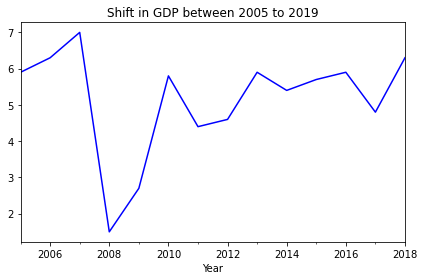

In [ ]:
#plotting GDP trend

df.Gross_Domestic_Product_GDP.resample('Y').mean().plot(title = 'Shift in GDP between 2005 to 2019', color='blue')
plt.tight_layout()
plt.show()

**Studying the trend in Number_of_Crimes_Reported**

In [ ]:
#Total Number_of_Crimes_Reported 
df.Number_of_Crimes_Reported.resample('Y').sum().plot(title = 'Shift in Number_of_Crimes_Reported between 2005 to 2019', color='blue')
plt.tight_layout()
plt.show()

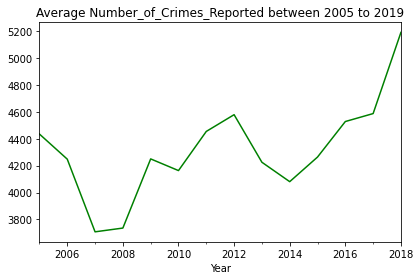

In [ ]:
#Trend in Number_of_Crimes_Reported averagely
df.Number_of_Crimes_Reported.resample('Y').mean().plot(title = 'Average Number_of_Crimes_Reported between 2005 to 2019', color='green')
plt.tight_layout()
plt.show()

**Investigating Correlation between Number_of_Crimes_Reported and Gross_Domestic_Product_GDP**

In [ ]:
df.dtypes

Unnamed: 0                      int64
Type_of_Crime                  object
Number_of_Crimes_Reported       int64
Gross_Domestic_Product_GDP    float64
dtype: object

In [ ]:
# Creating df1 -- dataframe for data columns
df1=df
df1.drop('Type_of_Crime', axis=1, inplace=True)
df1.drop('Unnamed: 0', axis=1, inplace=True)
df1.head()

,Number_of_Crimes_Reported,Gross_Domestic_Product_GDP
Year,,
2005-01-01,2313,5.9
2005-01-01,3153,5.9
2005-01-01,17304,5.9
2005-01-01,6936,5.9
2005-01-01,8454,5.9


In [ ]:
df.isnull().sum()

Number_of_Crimes_Reported     0
Gross_Domestic_Product_GDP    0
dtype: int64

In [ ]:
df1 = df

In [ ]:
#removing duplicate rows 
df = df[~df.index.duplicated()]

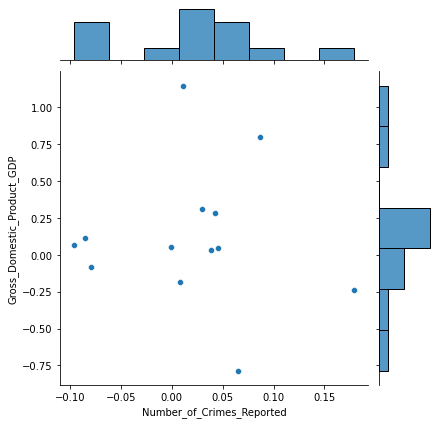

In [ ]:
data_returns = df.pct_change()
sns.jointplot(x='Number_of_Crimes_Reported', y='Gross_Domestic_Product_GDP', data=data_returns)
plt.show()

In [ ]:
data = df[['Gross_Domestic_Product_GDP','Number_of_Crimes_Reported']]
correlation = data.corr(method='pearson')
correlation

,Gross_Domestic_Product_GDP,Number_of_Crimes_Reported
Gross_Domestic_Product_GDP,1.000000,0.182149
Number_of_Crimes_Reported,0.182149,1.000000


---



#**5. Phase 5: Modelling**

**Tasks**

*   LSTM Data Preparation
*   Defination of supervised learning problem
*   Modelling


###**Data Preperation for LSTM**

In [ ]:
#importing required packages 
from math import sqrt
from numpy import concatenate
import matplotlib.pyplot as plt
from pandas import read_csv, get_dummies
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
  n_vars = 1 if type(data) is list else data.shape[1]
  df = DataFrame(data)
  cols, names = list(), list()

  # input sequence (t-n, ... t-1)
  for i in range(n_in, 0, -1):
    cols.append(df.shift(i))
    names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

  # forecast sequence (t, t+1, ... t+n)
  for i in range(0, n_out):
    cols.append(df.shift(-i))
    if i == 0:
      names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
    else:
      names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

  # put it all together
  agg = concat(cols, axis=1)
  agg.columns = names

  # drop rows with NaN values
  if dropnan:
    agg.dropna(inplace=True)
  return agg

**The aim is to build a model that predicts the Number of Crimes Reported.**
 
  **1. I first load the dataset that is intended to be used**  

In [ ]:
import pandas as pd

# load dataset
pathDataset = '/content/drive/MyDrive/Colab Notebooks/School Project docs and files/Crimes_Reported_from_2005_to_2019_with_Corresponding_annual_GDP.csv'
dataset = pd.read_csv(pathDataset, header=0, index_col=0)
dataset.head()

,Year,Type_of_Crime,Number_of_Crimes_Reported,Gross_Domestic_Product_GDP
0,2005-01-01,Homicide,2313,5.9
1,2005-01-01,Offences against morality,3153,5.9
2,2005-01-01,Other offences against persons,17304,5.9
3,2005-01-01,Robbery,6936,5.9
4,2005-01-01,Breakings,8454,5.9


**2.   Make 'Year' column to be index of the data set** 



In [ ]:
df_index = pd.read_csv(pathDataset, parse_dates=['Year'], index_col=['Year'])
df_index.to_csv('/content/drive/MyDrive/colab_notebooks/indexed_dataset.csv')

In [ ]:
df_index = pd.read_csv('/content/drive/MyDrive/colab_notebooks/indexed_dataset.csv', header=0, index_col=0)
df_index.columns

Index(['Unnamed: 0', 'Type_of_Crime', 'Number_of_Crimes_Reported',
       'Gross_Domestic_Product_GDP'],
      dtype='object')

In [ ]:
df_index.shape

(238, 4)

**Reorder column - Number of Crimes Reported - made as dependent** 


*   I will then reorder the columns in the dataset to make the "Number of Crimes Reported" column to be a dependent variable ... It will be dependent of the GDP

In [ ]:
cols = ['Number_of_Crimes_Reported','Gross_Domestic_Product_GDP','Type_of_Crime']
dataset = dataset.reindex(columns=cols)
dataset.columns

Index(['Number_of_Crimes_Reported', 'Gross_Domestic_Product_GDP',
       'Type_of_Crime'],
      dtype='object')

In [ ]:
dataset.shape

(238, 3)

### One Hot encoding Type_of_Crime column

One hot encoding is the process of transforming a column of string d_type to columns of 1s and 0s; since most predictive models take as input numerical data

In [ ]:
# generate binary values using get_dummies
dum_df = get_dummies(dataset, columns=["Type_of_Crime"])# merge with main df bridge_df on key values
#dataset = dataset.merge(dum_df)

# dataset
dum_df

,Year,Number_of_Crimes_Reported,Gross_Domestic_Product_GDP,Type_of_Crime_Breakings,Type_of_Crime_Corruption,Type_of_Crime_Criminal damage,Type_of_Crime_Dangerous drugs,Type_of_Crime_Economic crimes,Type_of_Crime_Homicide,Type_of_Crime_Offences against morality,Type_of_Crime_Offences involving police officers,Type_of_Crime_Offences involving tourists,Type_of_Crime_Other offences against persons,Type_of_Crime_Other penal code offences,Type_of_Crime_Robbery,Type_of_Crime_Stealing,Type_of_Crime_Theft by servant,Type_of_Crime_Theft of stock,Type_of_Crime_Traffic offences,Type_of_Crime_Vehicles and other thefts
0,2005-01-01,2313,5.9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2005-01-01,3153,5.9,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2005-01-01,17304,5.9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2005-01-01,6936,5.9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,2005-01-01,8454,5.9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,2018-01-01,4100,6.3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
234,2018-01-01,119,6.3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
235,2018-01-01,174,6.3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
236,2018-01-01,93,6.3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
dataset = dum_df
dataset.columns

Index(['Year', 'Number_of_Crimes_Reported', 'Gross_Domestic_Product_GDP',
       'Type_of_Crime_Breakings', 'Type_of_Crime_Corruption',
       'Type_of_Crime_Criminal damage', 'Type_of_Crime_Dangerous drugs',
       'Type_of_Crime_Economic crimes', 'Type_of_Crime_Homicide',
       'Type_of_Crime_Offences against morality',
       'Type_of_Crime_Offences involving police officers',
       'Type_of_Crime_Offences involving tourists',
       'Type_of_Crime_Other offences against persons',
       'Type_of_Crime_Other penal code offences', 'Type_of_Crime_Robbery',
       'Type_of_Crime_Stealing', 'Type_of_Crime_Theft by servant',
       'Type_of_Crime_Theft of stock', 'Type_of_Crime_Traffic offences',
       'Type_of_Crime_Vehicles and other thefts'],
      dtype='object')

In [ ]:
#Renaming columns
dataset.rename(columns = {
       'Type_of_Crime_Criminal damage':'Type_of_Crime_Criminal_damage', 
       'Type_of_Crime_Dangerous drugs':'Type_of_Crime_Dangerous_drugs',
       'Type_of_Crime_Economic crimes':'Type_of_Crime_Economic_crimes' ,
        'Type_of_Crime_Offences against morality':'Type_of_Crime_Offences_against_morality',
       'Type_of_Crime_Offences involving police officers':'Type_of_Crime_Offences_involving_police_officers',
       'Type_of_Crime_Offences involving tourists':'Type_of_Crime_Offences_involving_tourists',
       'Type_of_Crime_Other offences against persons':'Type_of_Crime_Other_offences_against_persons',  
       'Type_of_Crime_Other penal code offences':'Type_of_Crime_Other_penal_code_offences',
        'Type_of_Crime_Theft by servant':'Type_of_Crime_Theft_by_servant',
       'Type_of_Crime_Theft of stock':'Type_of_Crime_Theft_of_stock',
        'Type_of_Crime_Traffic offences':'Type_of_Crime_Traffic_offences',
       'Type_of_Crime_Vehicles and other thefts':'Type_of_Crime_Vehicles_and_other_thefts'
    }, inplace =True)

In [ ]:
dataset.columns

Index(['Year', 'Number_of_Crimes_Reported', 'Gross_Domestic_Product_GDP',
       'Type_of_Crime_Breakings', 'Type_of_Crime_Corruption',
       'Type_of_Crime_Criminal_damage', 'Type_of_Crime_Dangerous_drugs',
       'Type_of_Crime_Economic_crimes', 'Type_of_Crime_Homicide',
       'Type_of_Crime_Offences_against_morality',
       'Type_of_Crime_Offences_involving_police_officers',
       'Type_of_Crime_Offences_involving_tourists',
       'Type_of_Crime_Other_offences_against_persons',
       'Type_of_Crime_Other_penal_code_offences', 'Type_of_Crime_Robbery',
       'Type_of_Crime_Stealing', 'Type_of_Crime_Theft_by_servant',
       'Type_of_Crime_Theft_of_stock', 'Type_of_Crime_Traffic_offences',
       'Type_of_Crime_Vehicles_and_other_thefts'],
      dtype='object')

**Saving the dataset as a new CSV file**

In [ ]:
pathFinal = '/content/drive/MyDrive/Colab Notebooks/School Project docs and files/'
dataset.to_csv(pathFinal + 'Final_1_Crimes_Recorded_from_2005_to_2019_with_corresponding_Yearly_GDP_values.csv') 

In [ ]:
import pandas as pd
pathFinal = '/content/drive/MyDrive/Colab Notebooks/School Project docs and files/'
df = pd.read_csv(pathFinal + 'Final_1_Crimes_Recorded_from_2005_to_2019_with_corresponding_Yearly_GDP_values.csv',
                 parse_dates = ['Year'], index_col = ['Year'])

In [ ]:
df.dtypes

Unnamed: 0                                            int64
Number_of_Crimes_Reported                             int64
Gross_Domestic_Product_GDP                          float64
Type_of_Crime_Breakings                               int64
Type_of_Crime_Corruption                              int64
Type_of_Crime_Criminal_damage                         int64
Type_of_Crime_Dangerous_drugs                         int64
Type_of_Crime_Economic_crimes                         int64
Type_of_Crime_Homicide                                int64
Type_of_Crime_Offences_against_morality               int64
Type_of_Crime_Offences_involving_police_officers      int64
Type_of_Crime_Offences_involving_tourists             int64
Type_of_Crime_Other_offences_against_persons          int64
Type_of_Crime_Other_penal_code_offences               int64
Type_of_Crime_Robbery                                 int64
Type_of_Crime_Stealing                                int64
Type_of_Crime_Theft_by_servant          

In [ ]:
df.head(20)

,Unnamed: 0,Number_of_Crimes_Reported,Gross_Domestic_Product_GDP,Type_of_Crime_Breakings,Type_of_Crime_Corruption,Type_of_Crime_Criminal_damage,Type_of_Crime_Dangerous_drugs,Type_of_Crime_Economic_crimes,Type_of_Crime_Homicide,Type_of_Crime_Offences_against_morality,Type_of_Crime_Offences_involving_police_officers,Type_of_Crime_Offences_involving_tourists,Type_of_Crime_Other_offences_against_persons,Type_of_Crime_Other_penal_code_offences,Type_of_Crime_Robbery,Type_of_Crime_Stealing,Type_of_Crime_Theft_by_servant,Type_of_Crime_Theft_of_stock,Type_of_Crime_Traffic_offences,Type_of_Crime_Vehicles_and_other_thefts
Year,,,,,,,,,,,,,,,,,,,,
2005-01-01,0,2313,5.9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2005-01-01,1,3153,5.9,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2005-01-01,2,17304,5.9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2005-01-01,3,6936,5.9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2005-01-01,4,8454,5.9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2005-01-01,5,2219,5.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2005-01-01,6,12589,5.9,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2005-01-01,7,2874,5.9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2005-01-01,8,1718,5.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.shape

(238, 20)

**Normalizing the Attributes using MinMaxScaler**

*   Normalizing is the process of transforming the features’ values which are numeric in a given data set so that the values be in a specific range.
*   Normalization is mostly achieved using a scalar.
*   For example, in this case, the values in the ‘Number_of_Crimes_Reported’ column, which is a feature in our dataset, were normalized. Its values were transformed to be in a range between 0 and 1.


In [ ]:
dataset.columns

Index(['Year', 'Type_of_Crime', 'Number_of_Crimes_Reported',
       'Gross_Domestic_Product_GDP'],
      dtype='object')

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

Index(['Number_of_Crimes_Reported', 'Gross_Domestic_Product_GDP',
       'Type_of_Crime_Breakings', 'Type_of_Crime_Corruption',
       'Type_of_Crime_Criminal_damage', 'Type_of_Crime_Dangerous_drugs',
       'Type_of_Crime_Economic_crimes', 'Type_of_Crime_Homicide',
       'Type_of_Crime_Offences_against_morality',
       'Type_of_Crime_Offences_involving_police_officers',
       'Type_of_Crime_Offences_involving_tourists',
       'Type_of_Crime_Other_offences_against_persons',
       'Type_of_Crime_Other_penal_code_offences', 'Type_of_Crime_Robbery',
       'Type_of_Crime_Stealing', 'Type_of_Crime_Theft_by_servant',
       'Type_of_Crime_Theft_of_stock', 'Type_of_Crime_Traffic_offences',
       'Type_of_Crime_Vehicles_and_other_thefts'],
      dtype='object')

In [ ]:
df.head(20)

,Number_of_Crimes_Reported,Gross_Domestic_Product_GDP,Type_of_Crime_Breakings,Type_of_Crime_Corruption,Type_of_Crime_Criminal_damage,Type_of_Crime_Dangerous_drugs,Type_of_Crime_Economic_crimes,Type_of_Crime_Homicide,Type_of_Crime_Offences_against_morality,Type_of_Crime_Offences_involving_police_officers,Type_of_Crime_Offences_involving_tourists,Type_of_Crime_Other_offences_against_persons,Type_of_Crime_Other_penal_code_offences,Type_of_Crime_Robbery,Type_of_Crime_Stealing,Type_of_Crime_Theft_by_servant,Type_of_Crime_Theft_of_stock,Type_of_Crime_Traffic_offences,Type_of_Crime_Vehicles_and_other_thefts
Year,,,,,,,,,,,,,,,,,,,
2005-01-01,2313,5.9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2005-01-01,3153,5.9,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2005-01-01,17304,5.9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2005-01-01,6936,5.9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2005-01-01,8454,5.9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2005-01-01,2219,5.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2005-01-01,12589,5.9,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2005-01-01,2874,5.9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2005-01-01,1718,5.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.shape

(238, 19)

In [ ]:
values = df.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [ ]:
scaled.shape

(238, 19)

**Saving the Scaler**

In [ ]:
import joblib
pathScaler = '/content/drive/MyDrive/colab_notebooks/Crimes_Recorded.pkl'

joblib.dump(scaler, pathScaler)

['/content/drive/MyDrive/colab_notebooks/Crimes_Recorded.pkl']

**Framing the problem into a Supervised Learning Problem**

In [ ]:
reframed = series_to_supervised(scaled, 1, 1)
reframed.columns

Index(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
       'var6(t-1)', 'var7(t-1)', 'var8(t-1)', 'var9(t-1)', 'var10(t-1)',
       'var11(t-1)', 'var12(t-1)', 'var13(t-1)', 'var14(t-1)', 'var15(t-1)',
       'var16(t-1)', 'var17(t-1)', 'var18(t-1)', 'var19(t-1)', 'var1(t)',
       'var2(t)', 'var3(t)', 'var4(t)', 'var5(t)', 'var6(t)', 'var7(t)',
       'var8(t)', 'var9(t)', 'var10(t)', 'var11(t)', 'var12(t)', 'var13(t)',
       'var14(t)', 'var15(t)', 'var16(t)', 'var17(t)', 'var18(t)', 'var19(t)'],
      dtype='object')

In [ ]:
reframed.shape

(237, 38)

**Removing the columns not to be predicted**

I need to predict the Number_of_Crimes which is var1(t)

In [ ]:
#Columns to be dropped 
reframed.columns[20:]

Index(['var2(t)', 'var3(t)', 'var4(t)', 'var5(t)', 'var6(t)', 'var7(t)',
       'var8(t)', 'var9(t)', 'var10(t)', 'var11(t)', 'var12(t)', 'var13(t)',
       'var14(t)', 'var15(t)', 'var16(t)', 'var17(t)', 'var18(t)', 'var19(t)'],
      dtype='object')

In [ ]:
#dropping the displayed columns -- columns not to be predicted
reframed.drop(reframed.columns[20:], axis=1, inplace=True)

#display the remainig columns -- columns to predict  
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  ...  var18(t-1)  var19(t-1)   var1(t)
1   0.092339        0.8        0.0  ...         0.0         0.0  0.125873
2   0.125873        0.8        0.0  ...         0.0         0.0  0.690806
3   0.690806        0.8        0.0  ...         0.0         0.0  0.276897
4   0.276897        0.8        0.0  ...         0.0         0.0  0.337499
5   0.337499        0.8        1.0  ...         0.0         0.0  0.088586

[5 rows x 20 columns]


*   The output of the above code shows that there are 19 input variables(input series), and 1 output variable(Number_of_Crimes).




In [ ]:
reframed.shape

(237, 20)

**Splitting the dataset into train set and test set**

I have 14 years worth of data

In [ ]:
values = reframed.values

# Setting the train dataset to be the first 13 years of data
n_train_years = 13*17

# split into train and test sets
train = values[:n_train_years, :]
test = values[n_train_years:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(221, 1, 19) (221,) (16, 1, 19) (16,)


**Designing and fitting the Neural Network**

In [ ]:
from keras.layers import Dropout

# Initialising the RNN
model = Sequential()
model.add(LSTM(units = 50, input_shape=(train_X.shape[1], train_X.shape[2])))

# Adding a dropout of 20% to minimize overfitting
model.add(Dropout(0.2))

# Adding the output layer
# For Full connection layer I use dense, with unit=1 since output is 1D
# I use softplus activation, since I want the output to be only positive values(0 to +ve inf)
model.add(Dense(1, activation='softplus'))

#compiling the model
model.compile(loss='mae', optimizer='adam')

from keras.callbacks import EarlyStopping, ModelCheckpoint

pathModel = '/content/drive/MyDrive/Colab Notebooks/School Project docs and files/Predicting_Number_of_Crimes_model.h5'

# Create callbacks -- EarlyStopping, ModelCheckpoint

# EarlyStopping callback with patience
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# ModelCheckpoint callback, for saving best model
mc = ModelCheckpoint(pathModel, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# fitting the network model
history = model.fit(train_X, train_y, epochs= 200, batch_size=7,
                    validation_data=(test_X, test_y), verbose=2, shuffle=False,
                    callbacks=[es, mc])

Epoch 1/200

Epoch 00001: val_loss improved from inf to 0.41936, saving model to /content/drive/MyDrive/Colab Notebooks/School Project docs and files/Predicting_Number_of_Crimes_model.h5
32/32 - 3s - loss: 0.4880 - val_loss: 0.4194 - 3s/epoch - 108ms/step
Epoch 2/200

Epoch 00002: val_loss improved from 0.41936 to 0.32103, saving model to /content/drive/MyDrive/Colab Notebooks/School Project docs and files/Predicting_Number_of_Crimes_model.h5
32/32 - 0s - loss: 0.3981 - val_loss: 0.3210 - 138ms/epoch - 4ms/step
Epoch 3/200

Epoch 00003: val_loss improved from 0.32103 to 0.21452, saving model to /content/drive/MyDrive/Colab Notebooks/School Project docs and files/Predicting_Number_of_Crimes_model.h5
32/32 - 0s - loss: 0.2959 - val_loss: 0.2145 - 165ms/epoch - 5ms/step
Epoch 4/200

Epoch 00004: val_loss improved from 0.21452 to 0.15547, saving model to /content/drive/MyDrive/Colab Notebooks/School Project docs and files/Predicting_Number_of_Crimes_model.h5
32/32 - 0s - loss: 0.1979 - val

**Plotting the Loss charts**

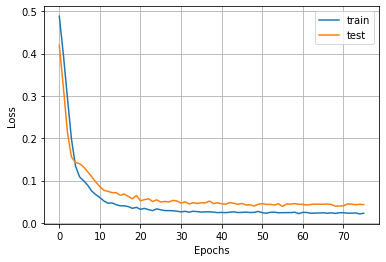

In [ ]:
import matplotlib.pyplot as plt

# plotting the history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()



---





#**6. Phase 6: Model Evaluation**



1.   We will first load the saved model
2.   Do a prediction of the Number_of_Crimes
3.   Evaluate the performance of the model through plotted curves and metrics--RMSE  



**6.1 Loading the Model**

In [ ]:
#load model
from tensorflow.keras.models import load_model

pathModel = '/content/drive/MyDrive/Colab Notebooks/School Project docs and files/Predicting_Number_of_Crimes_model.h5'

model = load_model(pathModel)

**6.2 Predicting the Number of Crimes**

In [ ]:
#making a prediction
yhat = model.predict(test_X)

#reshaping test_X
test_x = test_X.reshape((test_X.shape[0], test_X.shape[2]))

#invert scaling for forecast
inv_yhat = concatenate((yhat, test_x[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

#invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_x[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

**Display the values that are predicted i.e Number_of_Crimes_Reported**

In [ ]:
#Type casting the predictions to int type
inv_yhat = inv_yhat.astype(int)

#Displaying Predicted values
print('The values that are predicted are: ')
print(inv_yhat)

The values that are predicted are: 
[ 4786 20988  3034  6666  2109 11805  2529  1404  5470   121  3653  2850
   137   126   125  5906]


**6.3 Evaluating the model through the RMSE -- Root Mean Square Error**

*   I evaluated the model using Root Mean Square Error which is used as a 
heuristic to evaluate trained models for their accuracy and functionality too.
*   I managed to tune the model’s hyper-parameters through which I obtained a low RMSE of 1533.166. This was achieved by using the vanilla LSTM with a batch size of 7, after training for 200 epochs.

*   Normalizing the RMSE in the range 0 to 1 yielded an NRMSE of 0.062, which is low, depicting that the model’s performance was excellent.

*   To get the models accuracy, I obtained the difference between 1 and the normalized RMSE obtained. The difference was 0.938 translating to an accuracy of 93.8 % which can be conclude as an accuracy of 94 %.


In [ ]:
#calculating the RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Root Mean Square Error: %.3f' % rmse)

#Normalizing the RMSE using range
nrmse = rmse/ (inv_y.max() - inv_yhat.min())
print('Normalized Root Mean Square Error: %.3f' %nrmse)

#Accuracy of model
accuracy = 1-nrmse
print("Accuracy of model is: %.3f " % accuracy)

Root Mean Square Error: 1533.166
Normalized Root Mean Square Error: 0.062
Accuracy of model is: 0.938 


**Plotting Actual values against Forecast values** 

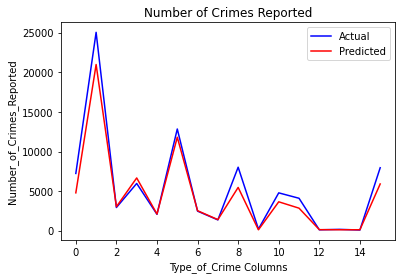

In [ ]:
import matplotlib.pyplot as plt
plt.plot(inv_y, color = 'blue', label = 'Actual')
plt.plot(inv_yhat, color = 'red', label = 'Predicted')
plt.title('Number of Crimes Reported')
plt.xlabel('Type_of_Crime Columns')
plt.ylabel('Number_of_Crimes_Reported')
plt.legend()
plt.show()

#**Phase 7: Model Deployment**

In [ ]:
!pip install flask

In [ ]:
!pip install flask-wtf

     |████████████████████████████████| 136 kB 6.7 MB/s 


In [ ]:
!pip install gunicorn 

     |████████████████████████████████| 79 kB 4.6 MB/s 


In [ ]:
!pip freeze > requirements.txt

In [ ]:
dataset['Type_of_Crime'].unique()

array(['Homicide', 'Offences against morality',
       'Other offences against persons', 'Robbery', 'Breakings',
       'Theft of stock', 'Stealing', 'Theft by servant',
       'Vehicles and other thefts', 'Dangerous drugs', 'Traffic offences',
       'Criminal damage', 'Economic crimes', 'Corruption',
       'Offences involving police officers',
       'Offences involving tourists', 'Other penal code offences'],
      dtype=object)

In [ ]:
len(dataset['Type_of_Crime'].unique())

17

In [ ]:
import pandas as pd
df2018 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/School Project docs and files/2018_Crimes_and_GDP.csv')

In [ ]:
df2018.dtypes

Unnamed: 0                         int64
Year                              object
Type of Crime                     object
Number of Crimes Reported         object
Gross Domenstic Product (GDP)    float64
dtype: object